GROUP EXERCISE 2:
Anusha Yella: 100003468
Deeksha Marulasiddaiah: 100003465

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
data = pd.read_csv('/content/healthcare-dataset-stroke-data 1.csv')

In [3]:
# Handle missing values by imputing with the mean
if 'bmi' in data.columns:
    data['bmi'].fillna(data['bmi'].mean(), inplace=True)

# Encode categorical variables
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Separate features and target
X = data_encoded.drop(['stroke', 'id'], axis=1)
y = data_encoded['stroke']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
numerical_features = X_train.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Ensure data is converted to float32 for TensorFlow compatibility
X_train_rnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1).astype(np.float32)
X_test_rnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1).astype(np.float32)


<ipython-input-3-dbbf8bd9f415>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].mean(), inplace=True)


** Feedforward Neural Network (FFNN)**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9434 - loss: 0.2601 - val_accuracy: 0.9548 - val_loss: 0.1535
Epoch 2/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9655 - loss: 0.1234 - val_accuracy: 0.9548 - val_loss: 0.1526
Epoch 3/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9605 - loss: 0.1350 - val_accuracy: 0.9548 - val_loss: 0.1495
Epoch 4/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9590 - loss: 0.1423 - val_accuracy: 0.9548 - val_loss: 0.1481
Epoch 5/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9520 - loss: 0.1519 - val_accuracy: 0.9548 - val_loss: 0.1472
Epoch 6/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9497 - loss: 0.1557 - val_accuracy: 0.9548 - val_loss: 0.1454
Epoch 7/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9541 - loss: 0.1450 - val_accuracy: 0.9548 - val_loss: 0.1457
Epoch 8/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9550 - loss: 0.1454 - val_accuracy: 0.

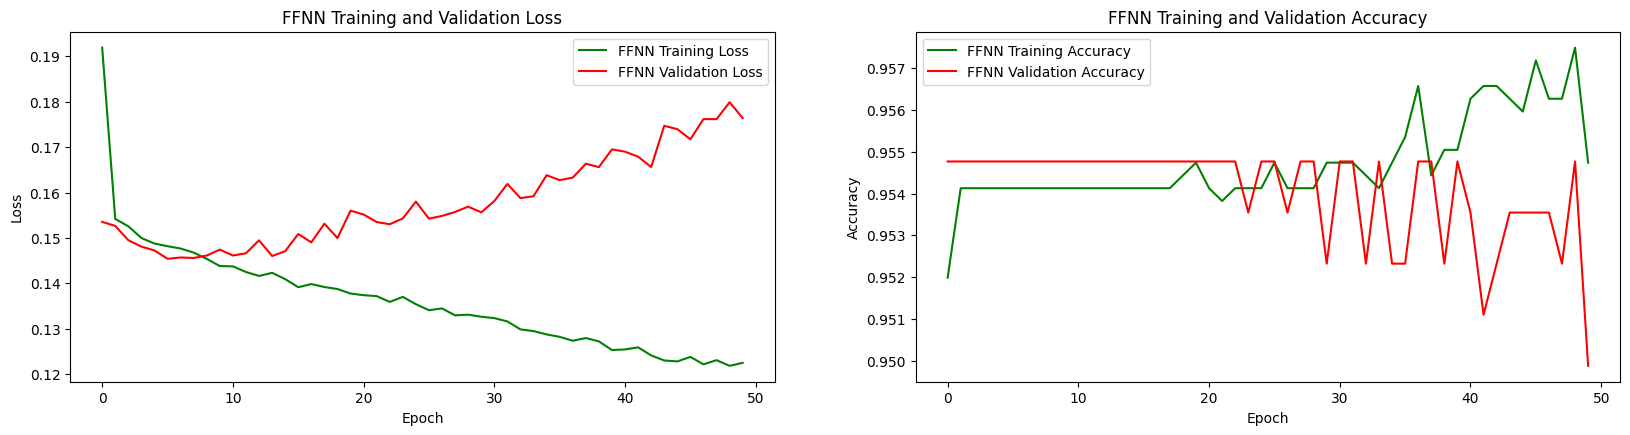

In [4]:
# Build and train a Feedforward Neural Network (FFNN)
num_classes = 2
model_ffnn = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model_ffnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_ffnn = model_ffnn.fit(X_train, y_train, epochs=50, batch_size=4, validation_split=0.2, verbose=1)

# Evaluate FFNN
ffnn_loss, ffnn_accuracy = model_ffnn.evaluate(X_test, y_test, verbose=0)
print(f"FFNN Test Accuracy: {ffnn_accuracy:.2f}")
print(f"FFNN Test Loss: {ffnn_loss:.2f}")

# Visualize
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.plot(history_ffnn.history['loss'], label='FFNN Training Loss', color='green')
plt.plot(history_ffnn.history['val_loss'], label='FFNN Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('FFNN Training and Validation Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(history_ffnn.history['accuracy'], label='FFNN Training Accuracy', color='green')
plt.plot(history_ffnn.history['val_accuracy'], label='FFNN Validation Accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('FFNN Training and Validation Accuracy')
plt.legend()

**Recurrent Neural Network (RNN)**

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


818/818 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8675 - loss: 0.3501 - val_accuracy: 0.9548 - val_loss: 0.1648
Epoch 2/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9515 - loss: 0.1753 - val_accuracy: 0.9548 - val_loss: 0.1581
Epoch 3/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9572 - loss: 0.1538 - val_accuracy: 0.9548 - val_loss: 0.1560
Epoch 4/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9548 - loss: 0.1502 - val_accuracy: 0.9548 - val_loss: 0.1628
Epoch 5/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9558 - loss: 0.1535 - val_accuracy: 0.9548 - val_loss: 0.1563
Epoch 6/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9546 - loss: 0.1542 - val_accuracy: 0.9548 - val_loss: 0.1481
Epoch 7/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9544 - loss: 0.1588 - val_accuracy: 0.9548 - val_loss: 0.1523
Epoch 8/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9554 - loss: 0.1544 - val_accuracy: 0.9548 - val_

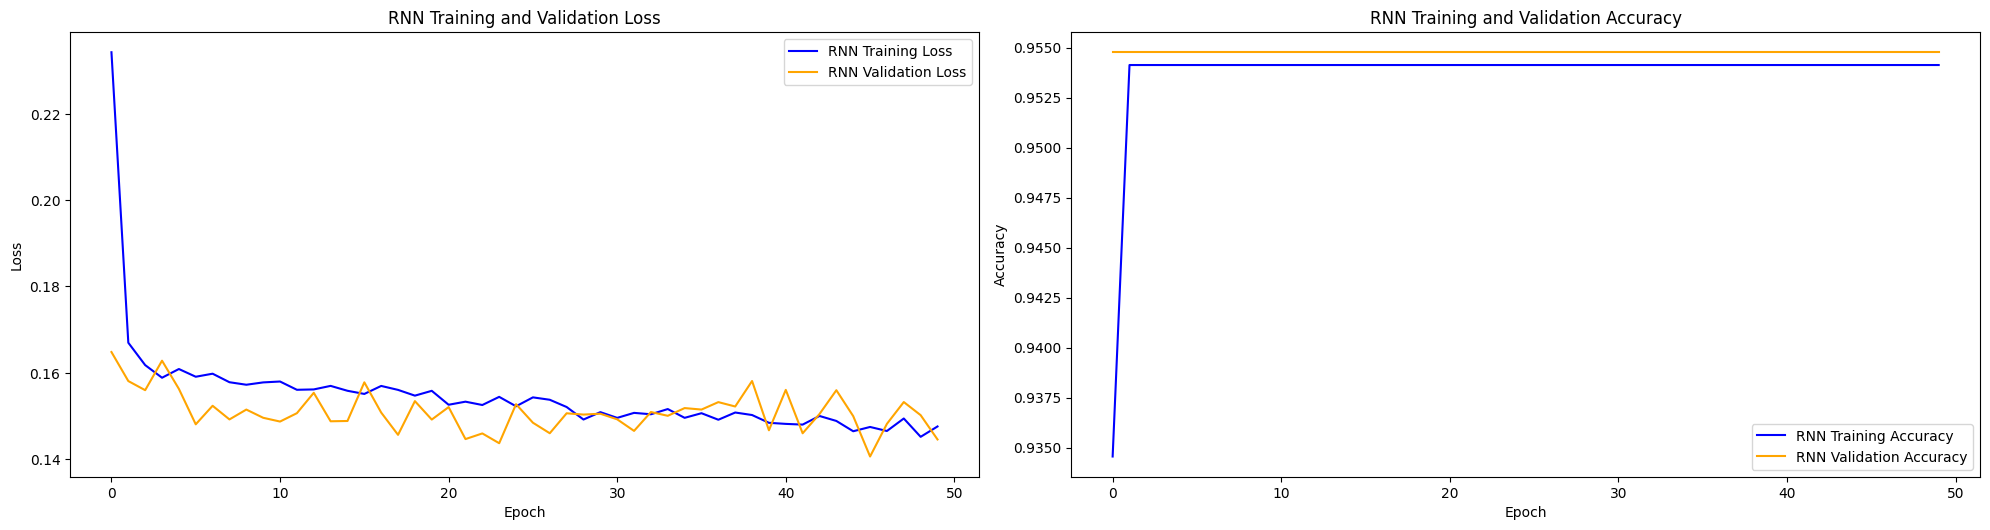

In [5]:
# Recurrent Neural Network (RNN)
model_rnn = Sequential([
    SimpleRNN(16, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(8, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_rnn = model_rnn.fit(X_train_rnn, y_train, epochs=50, batch_size=4, validation_split=0.2, verbose=1)

# Evaluate RNN
rnn_loss, rnn_accuracy = model_rnn.evaluate(X_test_rnn, y_test, verbose=0)
print(f"RNN Test Accuracy: {rnn_accuracy:.2f}")
print(f"RNN Test Loss: {rnn_loss:.2f}")

# Visualize the RNN Model
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 3)
plt.plot(history_rnn.history['loss'], label='RNN Training Loss', color='blue')
plt.plot(history_rnn.history['val_loss'], label='RNN Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('RNN Training and Validation Loss')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(history_rnn.history['accuracy'], label='RNN Training Accuracy', color='blue')
plt.plot(history_rnn.history['val_accuracy'], label='RNN Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('RNN Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



**Long Short-Term Memory (LSTM)**

Epoch 1/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9073 - loss: 0.3781 - val_accuracy: 0.9548 - val_loss: 0.1667
Epoch 2/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9599 - loss: 0.1678 - val_accuracy: 0.9548 - val_loss: 0.1692
Epoch 3/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9494 - loss: 0.1815 - val_accuracy: 0.9548 - val_loss: 0.1588
Epoch 4/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9557 - loss: 0.1643 - val_accuracy: 0.9548 - val_loss: 0.1762
Epoch 5/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9473 - loss: 0.1816 - val_accuracy: 0.9548 - val_loss: 0.1574
Epoch 6/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9558 - loss: 0.1548 - val_accuracy: 0.9548 - val_loss: 0.1578
Epoch 7/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9606 - loss: 0.1424 - val_accuracy: 0.9548 - val_loss: 0.1521
Epoch 8/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9584 - loss: 0.1512 - val_accuracy: 0

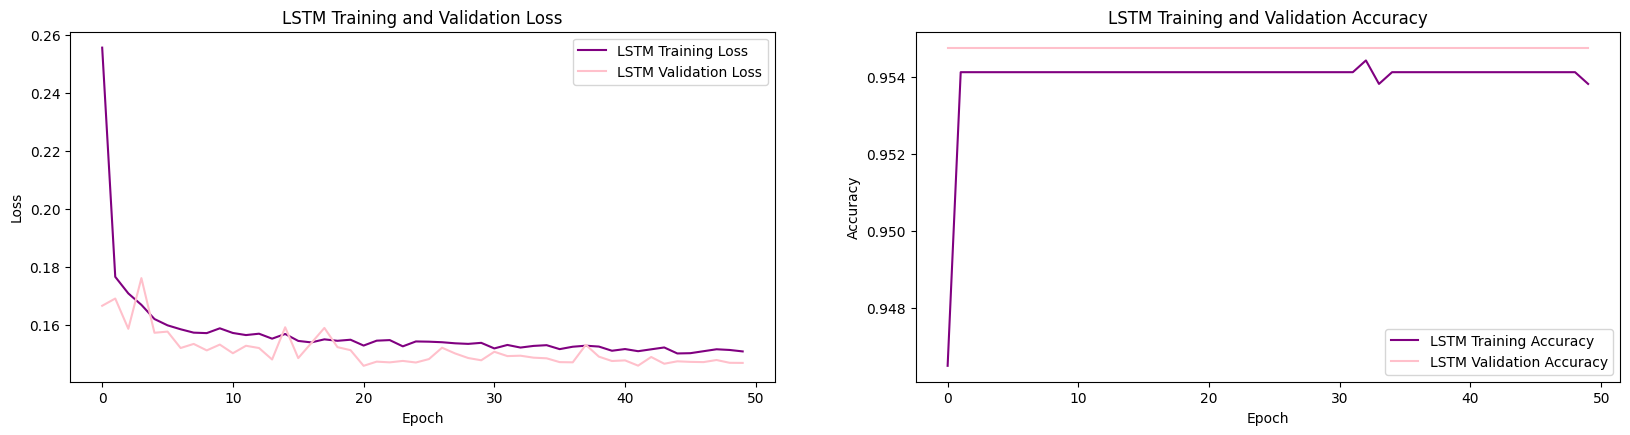

In [6]:
# LSTM
model_lstm = Sequential([
    LSTM(16, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(8, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_lstm = model_lstm.fit(X_train_rnn, y_train, epochs=50, batch_size=4, validation_split=0.2, verbose=1)

# Evaluate LSTM
lstm_loss, lstm_accuracy = model_lstm.evaluate(X_test_rnn, y_test, verbose=0)
print(f"LSTM Test Accuracy: {lstm_accuracy:.2f}")
print(f"LSTM Test Loss: {lstm_loss:.2f}")

# Visualize the LSTM Model
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.plot(history_lstm.history['loss'], label='LSTM Training Loss', color='purple')
plt.plot(history_lstm.history['val_loss'], label='LSTM Validation Loss', color='pink')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LSTM Training and Validation Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(history_lstm.history['accuracy'], label='LSTM Training Accuracy', color='purple')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Validation Accuracy', color='pink')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('LSTM Training and Validation Accuracy')
plt.legend()

**Convolutional Neural Network (CNN)**

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


818/818 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8828 - loss: 0.2801 - val_accuracy: 0.9548 - val_loss: 0.1695
Epoch 2/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9537 - loss: 0.1704 - val_accuracy: 0.9548 - val_loss: 0.1663
Epoch 3/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9476 - loss: 0.1722 - val_accuracy: 0.9548 - val_loss: 0.1639
Epoch 4/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9555 - loss: 0.1653 - val_accuracy: 0.9548 - val_loss: 0.1649
Epoch 5/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9523 - loss: 0.1681 - val_accuracy: 0.9548 - val_loss: 0.1635
Epoch 6/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9544 - loss: 0.1624 - val_accuracy: 0.9548 - val_loss: 0.1662
Epoch 7/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9495 - loss: 0.1693 - val_accuracy: 0.9548 - val_loss: 0.1617
Epoch 8/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9527 - loss: 0.1595 - val_accuracy: 0.9548 - val_

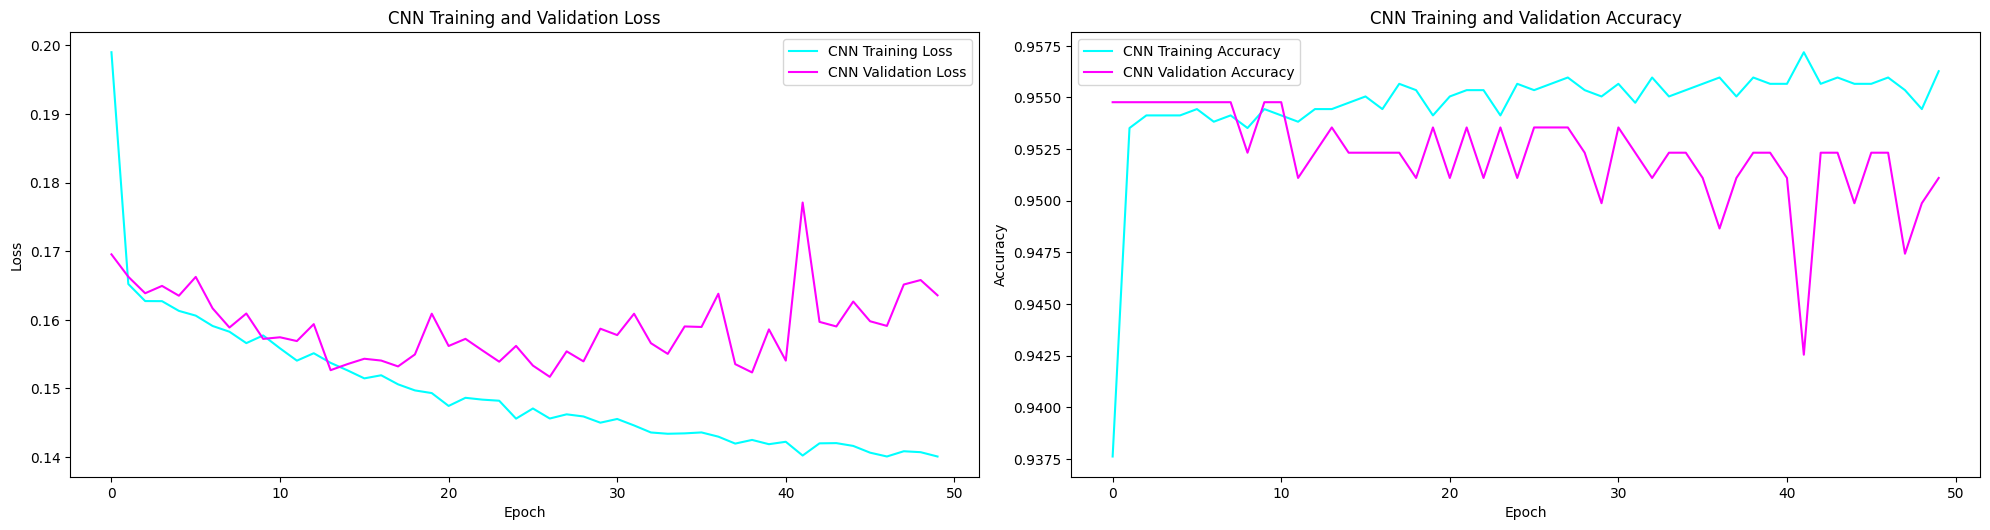

In [7]:
# Convolutional Neural Network (CNN)
X_train_cnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1).astype(np.float32)
X_test_cnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1).astype(np.float32)

model_cnn = Sequential([
    Conv1D(16, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(8, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_cnn = model_cnn.fit(X_train_cnn, y_train, epochs=50, batch_size=4, validation_split=0.2, verbose=1)

# Evaluate CNN
cnn_loss, cnn_accuracy = model_cnn.evaluate(X_test_cnn, y_test, verbose=0)
print(f"CNN Test Accuracy: {cnn_accuracy:.2f}")
print(f"CNN Test Loss: {cnn_loss:.2f}")

# Visualize the CNN Model
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 3)
plt.plot(history_cnn.history['loss'], label='CNN Training Loss', color='cyan')
plt.plot(history_cnn.history['val_loss'], label='CNN Validation Loss', color='magenta')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CNN Training and Validation Loss')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(history_cnn.history['accuracy'], label='CNN Training Accuracy', color='cyan')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Validation Accuracy', color='magenta')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

While accuracy and loss are identical for CNN, LSTM, and RNN, CNN is the best choice for the stroke dataset because:

It matches the dataset's structure.
It efficiently extracts patterns without the sequential overhead of RNN/LSTM.

Strengths of CNN Over Others:

Feature Hierarchies:
CNN excels in extracting spatial or feature hierarchies in tabular data.

Regularization:
Pooling layers help mitigate overfitting.

Efficiency:
More computationally efficient than LSTM and RNN for non-temporal data.

Limitations of CNN:
More complex than FFNN and requires tuning.
Less interpretable compared to FFNN.